In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
from sklearn.datasets import make_blobs

np.random.seed(0)
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

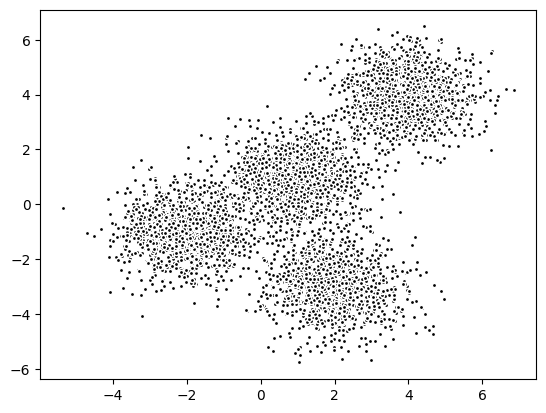

In [64]:
plt.plot(X[:,0],X[:,1],'w',marker='.',markerfacecolor='k')

In [65]:
from sklearn.cluster import KMeans

k_means = KMeans(init='k-means++',n_clusters=4,n_init=12)
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [66]:
k_means_lables = k_means.labels_
k_means_lables

array([0, 3, 3, ..., 1, 0, 0])

In [67]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

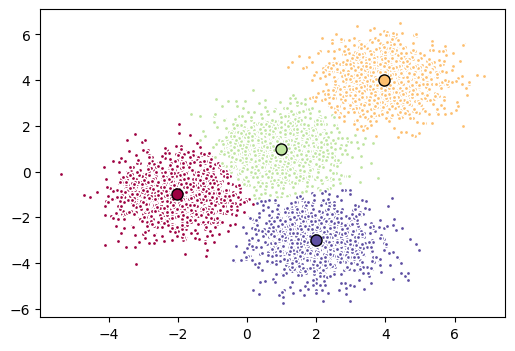

In [68]:
fig = plt.figure(figsize=(6,4))

colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_lables))))

ax = fig.add_subplot(1,1,1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])),colors):

    my_members = (k_means_lables==k)

    cluster_center = k_means_cluster_centers[k]

    ax.plot(X[my_members,0], X[my_members,1],'w',markerfacecolor=col, marker='.')

    ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col, markeredgecolor='k',markersize=8)

In [69]:
np.linspace(0,1,len(set(k_means_lables)))

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [70]:
plt.cm.Spectral(np.linspace(0,1,len(set(k_means_lables))))

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

## Practice

In [71]:
k_means1 = KMeans(init='k-means++',n_clusters=3,n_init=12)
k_means1.fit(X)

KMeans(n_clusters=3, n_init=12)

In [72]:
k_means1_lables = k_means1.labels_
k_means1_lables

array([1, 2, 2, ..., 0, 1, 1])

In [73]:
k_means1_cluster_centers = k_means1.cluster_centers_
k_means1_cluster_centers

array([[ 3.70503248,  3.70030577],
       [-0.8042542 , -0.16952334],
       [ 2.02030226, -2.94614399]])

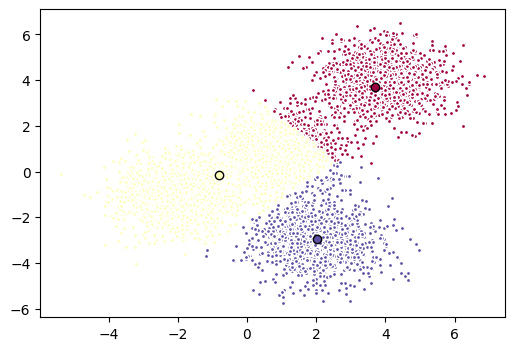

In [80]:
fig = plt.figure(figsize=(6,4))

colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means1_lables))))

ax = fig.add_subplot(1,1,1)

for k, cols in zip(range(3),colors):
    
    my_members = (k_means1_lables==k)

    cluster_center = k_means1_cluster_centers[k]

    ax.plot(X[my_members,0], X[my_members,1],'w',marker='.',markerfacecolor=cols)

    ax.plot(cluster_center[0],cluster_center[1],marker='o',markerfacecolor=cols, markeredgecolor='k')

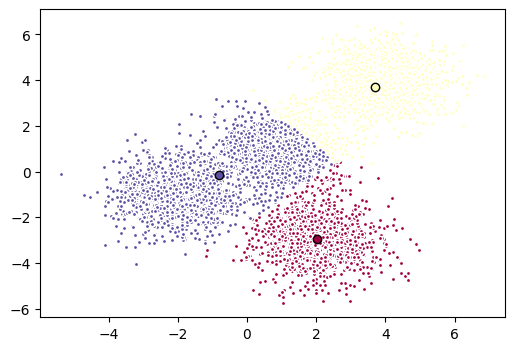

In [81]:
# copied code

k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

## K-Means Clustering using real dataset

In [84]:
path = "C:\\Users\\91897\\Downloads\\Cust_Segmentation.csv"
df = pd.read_csv(path)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [86]:
df.drop('Address', axis=1,inplace=True)

In [87]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [99]:
X = df.values[:,1:]
X = np.nan_to_num(X)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(X)
data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [104]:
from sklearn.cluster import KMeans

k_means = KMeans(init='k-means++', n_clusters=3, n_init=12)
k_means.fit(data)

KMeans(n_clusters=3, n_init=12)

In [117]:
labels = k_means.labels_
labels

array([0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2,
       2, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0,

In [111]:
df['Clus_km'] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [112]:
cluster_centers = k_means.cluster_centers_
cluster_centers

array([[-1.50796609e-01, -1.15651304e-01, -1.38795179e-01,
        -2.73411279e-01, -3.40626044e-01, -3.71502176e-01,
        -5.23796543e-01, -3.28592133e-01],
       [-3.90439547e-01,  1.62695612e-01, -6.79376729e-01,
        -3.86448408e-01, -6.83901553e-05, -6.93056978e-02,
         1.87982575e+00,  5.69270845e-01],
       [ 9.91773769e-01,  2.38756999e-01,  1.27421461e+00,
         1.43518566e+00,  1.24440502e+00,  1.43538377e+00,
        -2.09335587e-01,  5.57517111e-01]])

In [113]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
2,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646


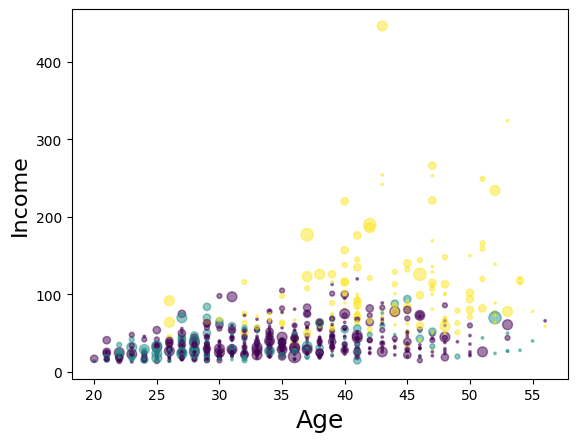

In [114]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


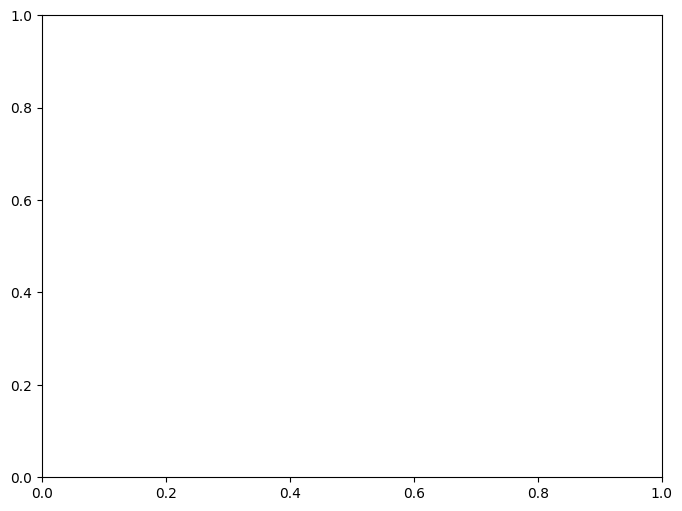

In [170]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float))

